In [1]:
#Q3 Now,we must also try to figure out what factors influence the price of a listing
import pandas as pd
import numpy as np
%matplotlib inline
#Now,we already have the data ready as we have treated our data to see how the ratings are related to other features
#Now,let us do the same for the price of the listings
listings=pd.read_csv(r"C:\Users\HP\Desktop\Udacity_Nanodegree\Data Science Blog Post\listings.csv")


In [2]:
#Choosing which columns to take from the 92 columns hat we have in our dataset
#'name','summary','description','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','neighbourhood_cleansed','zipcode','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy'

In [3]:
listings_clean=listings.loc[:,['name','summary','description','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','neighbourhood_cleansed','zipcode','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy']]

In [4]:
#Lets remove the % sign from the host_response_rate and host_acceptance_rate columns
listings_clean['host_response_rate']=listings_clean['host_response_rate'].str.replace('%','')
listings_clean['host_acceptance_rate']=listings_clean['host_acceptance_rate'].str.replace('%','')

In [5]:
#Converting host_response_rate and host_acceptance rate to float type
listings_clean['host_response_rate']=listings_clean['host_response_rate'].astype('float64')/100
listings_clean['host_acceptance_rate']=listings_clean['host_acceptance_rate'].astype('float64')/100
#Filling the missing values with 0
listings_clean['host_response_rate'].fillna(0,inplace=True)
listings_clean['host_acceptance_rate'].fillna(0,inplace=True)

In [6]:
#Converting the columns with binomial values 
#Let us  replace f with 0 and t with 1 in host_is_superhost column
listings_clean['host_is_superhost']=listings_clean['host_is_superhost'].str.replace('f','0')
listings_clean['host_is_superhost']=listings_clean['host_is_superhost'].str.replace('t','1')
listings_clean['instant_bookable']=listings_clean['instant_bookable'].str.replace('f','0')
listings_clean['instant_bookable']=listings_clean['instant_bookable'].str.replace('t','1')

In [7]:
#Converting these two coumns as well to float and converting it from percentage to number
listings_clean['host_is_superhost']=listings_clean['host_is_superhost'].astype('float64')
listings_clean['instant_bookable']=listings_clean['instant_bookable'].astype('float64')
#Filling the missing values with 0
listings_clean['host_is_superhost'].fillna(0,inplace=True)
listings_clean['instant_bookable'].fillna(0,inplace=True)

In [8]:
#We can see that these all columns are strings and have $ sign.We need to remove the $ sign and convert the type to float
listings_clean['price']=listings_clean['price'].str.replace('$','')
listings_clean['weekly_price']=listings_clean['weekly_price'].str.replace('$','')
listings_clean['monthly_price']=listings_clean['monthly_price'].str.replace('$','')
listings_clean['security_deposit']=listings_clean['security_deposit'].str.replace('$','')
listings_clean['cleaning_fee']=listings_clean['cleaning_fee'].str.replace('$','')
listings_clean['extra_people']=listings_clean['extra_people'].str.replace('$','')

In [9]:
#Also,removing the commas as well
listings_clean['price']=listings_clean['price'].str.replace(',','')
listings_clean['weekly_price']=listings_clean['weekly_price'].str.replace(',','')
listings_clean['monthly_price']=listings_clean['monthly_price'].str.replace(',','')
listings_clean['security_deposit']=listings_clean['security_deposit'].str.replace(',','')
listings_clean['cleaning_fee']=listings_clean['cleaning_fee'].str.replace(',','')
listings_clean['extra_people']=listings_clean['extra_people'].str.replace(',','')


In [10]:
listings_clean['price']=listings_clean['price'].astype('float64')
listings_clean['weekly_price']=listings_clean['weekly_price'].astype('float64')
listings_clean['monthly_price']=listings_clean['monthly_price'].astype('float64')
listings_clean['security_deposit']=listings_clean['security_deposit'].astype('float64')
listings_clean['cleaning_fee']=listings_clean['cleaning_fee'].astype('float64')
listings_clean['extra_people']=listings_clean['extra_people'].astype('float64')

In [11]:
#Let us see the ameneties column
listings_clean['amenities']=listings_clean['amenities'].str.replace("{","")
listings_clean['amenities']=listings_clean['amenities'].str.replace("}","")
listings_clean['amenities']=listings_clean['amenities'].str.replace(" ","")
listings_clean['amenities']=listings_clean['amenities'].str.replace('"','')
listings_clean['amenities']=listings_clean['amenities'].str.replace(",","  ")
listings_clean['amenities']

0       TV  CableTV  Internet  WirelessInternet  AirCo...
1       TV  Internet  WirelessInternet  Kitchen  FreeP...
2       TV  CableTV  Internet  WirelessInternet  AirCo...
3       Internet  WirelessInternet  Kitchen  IndoorFir...
4       TV  CableTV  Internet  WirelessInternet  Kitch...
5       WirelessInternet  FreeParkingonPremises  Heati...
6       WirelessInternet  FreeParkingonPremises  Heati...
7       WirelessInternet  Petsliveonthisproperty  Dog(...
8       TV  CableTV  Internet  WirelessInternet  Kitch...
9       TV  Internet  WirelessInternet  Kitchen  FreeP...
10      TV  CableTV  Internet  WirelessInternet  Kitch...
11      TV  CableTV  WirelessInternet  Kitchen  FreePa...
12      TV  CableTV  Internet  WirelessInternet  Kitch...
13      TV  CableTV  Internet  WirelessInternet  Kitch...
14      TV  CableTV  Internet  WirelessInternet  Kitch...
15      TV  CableTV  Internet  Kitchen  FreeParkingonP...
16      Internet  WirelessInternet  PetsAllowed  Break...
17      Wirele

In [12]:
#Now let us deal with the columns which have string values
# such as name,summary,description and amenities
#Name,summary and desription are not the faetures that would impact the rating.So,let us drop them as well
#We will also drop zipcode since we have neighbourhood column that we can use for our analysis
listings_clean=listings_clean.drop(['name','summary','description','zipcode'],axis=1)

In [13]:
#Let us see the number of unique values in the column priperty_type
listings_clean['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast', 'Other',
       'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent', nan], dtype=object)

In [14]:
#Now,here we have a lot of values,let us try to recode them into 6 categories
#Apartment,House,Cabin,Condominium,Bungalow and Townhouse
def assign(val):
    if val not in ['House','Apartment','Cabin','Condominium','Bungalow','Townhouse']:
        return 'Other'
    return val

listings_clean['property_type']=listings_clean['property_type'].apply(assign)

In [15]:
#Let us see if the recoding has been done properly or not
listings_clean['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Other', 'Bungalow',
       'Townhouse'], dtype=object)

In [16]:
#Let us also see the unique values in room_type column 
listings_clean['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [17]:
#Just three categories here.So,let us keep them column as it is

In [18]:
#Let us also see the bed_type column
listings_clean['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'], dtype=object)

In [19]:
#Let us recode the bed_type column as well and put them in two categories:bed and other
def assign1(val):
    if val not in ['Real Bed']:
        return 'Other'
    return val


listings_clean['bed_type']=listings_clean['bed_type'].apply(assign1)

In [20]:
#Converting host response categories to integer values
listings_clean['host_response_time'].replace('within an hour',1, inplace=True)
listings_clean['host_response_time'].replace('within a few hours',2,inplace=True)
listings_clean['host_response_time'].replace('within a day',3,inplace=True)
listings_clean['host_response_time'].replace('a few days or more',4,inplace=True)

In [21]:
#Filling the missing values of this column as well
listings_clean['host_response_time'].fillna(method='ffill',inplace=True)

In [22]:
#Let us also treat missing values of some other columns
listings_clean['beds'].fillna(method='ffill',inplace=True)
listings_clean['bathrooms'].fillna(method='ffill',inplace=True)
listings_clean['bedrooms'].fillna(method='ffill',inplace=True)
listings_clean['weekly_price'].fillna(0,inplace=True)
listings_clean['monthly_price'].fillna(0,inplace=True)
listings_clean['security_deposit'].fillna(0,inplace=True)
listings_clean['cleaning_fee'].fillna(0,inplace=True)
listings_clean['extra_people'].fillna(0,inplace=True)
listings_clean['review_scores_accuracy'].fillna(0,inplace=True)
listings_clean['review_scores_cleanliness'].fillna(0,inplace=True)
listings_clean['review_scores_checkin'].fillna(0,inplace=True)
listings_clean['review_scores_communication'].fillna(0,inplace=True)
listings_clean['review_scores_location'].fillna(0,inplace=True)
listings_clean['review_scores_value'].fillna(0,inplace=True)
listings_clean['review_scores_rating'].fillna(0,inplace=True)

In [23]:
#Let us also replace the columns ameneties with ameneties lenght as the number of ameneties can be associated with the length of the string in this column
listings_clean['amenities_length']=listings_clean['amenities'].str.len()
listings_clean=listings_clean.drop(['amenities'],axis=1)

In [24]:
#Now let us remove all the rows from the dataframe where we do not have our respose variable review_score_rating
listings_clean=listings_clean[listings_clean['price'].isnull()==0]

In [25]:
#Let us take all the numerical coulmns and see the correlation between them
col=['int64','float64']
listings_clean_numeric=listings_clean .select_dtypes(include=col)
listings_clean_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 26 columns):
host_response_time             3818 non-null float64
host_response_rate             3818 non-null float64
host_acceptance_rate           3818 non-null float64
host_is_superhost              3818 non-null float64
accommodates                   3818 non-null int64
bathrooms                      3818 non-null float64
bedrooms                       3818 non-null float64
beds                           3818 non-null float64
price                          3818 non-null float64
weekly_price                   3818 non-null float64
monthly_price                  3818 non-null float64
security_deposit               3818 non-null float64
cleaning_fee                   3818 non-null float64
guests_included                3818 non-null int64
extra_people                   3818 non-null float64
minimum_nights                 3818 non-null int64
maximum_nights                 3818 non-null int64


In [26]:
#Let us see how these columns are correlated to each other
listings_clean_numeric.corr()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,weekly_price,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,amenities_length
host_response_time,1.000000,-0.167917,-0.111110,-0.161036,0.046813,0.023332,0.071498,0.031624,0.069188,-0.000832,...,-0.001338,-0.106766,-0.101890,-0.111378,-0.100650,-0.102768,-0.099608,-0.107789,-0.242631,-0.121530
host_response_rate,-0.167917,1.000000,0.723693,0.179314,0.047155,0.001415,-0.024531,0.036948,-0.092520,0.005523,...,-0.050568,0.257999,0.260665,0.269769,0.259590,0.259613,0.258804,0.262065,0.130720,0.149806
host_acceptance_rate,-0.111110,0.723693,1.000000,0.174225,0.035726,-0.018584,-0.052079,0.018556,-0.130585,-0.022249,...,-0.037514,0.283390,0.287996,0.292234,0.285039,0.283140,0.286959,0.287670,0.118533,0.120913
host_is_superhost,-0.161036,0.179314,0.174225,1.000000,-0.002904,-0.003006,-0.029183,-0.023624,0.012131,0.064566,...,-0.037569,0.217923,0.217183,0.223322,0.205594,0.202550,0.200308,0.220607,0.081923,0.109342
accommodates,0.046813,0.047155,0.035726,-0.002904,1.000000,0.537664,0.770501,0.861064,0.652218,0.298239,...,0.003291,0.036648,0.034294,0.042512,0.039341,0.038589,0.035531,0.029379,0.024355,0.257077
bathrooms,0.023332,0.001415,-0.018584,-0.003006,0.537664,1.000000,0.609891,0.531887,0.515867,0.219166,...,-0.015065,0.005503,-0.000776,0.002976,-0.000274,-0.002896,-0.001932,0.002102,-0.048977,0.133024
bedrooms,0.071498,-0.024531,-0.052079,-0.029183,0.770501,0.609891,1.000000,0.752210,0.627512,0.288754,...,-0.008645,-0.008589,-0.012873,-0.011894,-0.009738,-0.011153,-0.015890,-0.012331,-0.068905,0.166847
beds,0.031624,0.036948,0.018556,-0.023624,0.861064,0.531887,0.752210,1.000000,0.589701,0.249595,...,-0.009053,0.012584,0.006684,0.015484,0.012181,0.012787,0.010975,0.009095,0.024269,0.211175
price,0.069188,-0.092520,-0.130585,0.012131,0.652218,0.515867,0.627512,0.589701,1.000000,0.394486,...,-0.003336,-0.019938,-0.021868,-0.016989,-0.024091,-0.025085,-0.014298,-0.032380,-0.031712,0.166171
weekly_price,-0.000832,0.005523,-0.022249,0.064566,0.298239,0.219166,0.288754,0.249595,0.394486,1.000000,...,0.023724,0.122100,0.122039,0.123288,0.123461,0.118011,0.122211,0.113808,0.013707,0.130076


In [27]:
#Let us plot the correlation 
corr = listings_clean_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,amenities_length
host_response_time,1,-0.167917,-0.11111,-0.161036,0.0468135,0.0233323,0.0714985,0.0316238,0.0691877,-0.000831781,-0.0544011,-0.0575382,0.036816,-0.0426151,-0.0250538,0.00928861,-0.00133846,-0.106766,-0.10189,-0.111378,-0.10065,-0.102768,-0.0996083,-0.107789,-0.242631,-0.12153
host_response_rate,-0.167917,1,0.723693,0.179314,0.0471546,0.00141542,-0.0245312,0.0369484,-0.0925202,0.00552314,0.0871471,-0.00212873,0.0489103,0.0629366,0.0399504,0.00525966,-0.0505683,0.257999,0.260665,0.269769,0.25959,0.259613,0.258804,0.262065,0.13072,0.149806
host_acceptance_rate,-0.11111,0.723693,1,0.174225,0.0357265,-0.0185845,-0.0520791,0.0185558,-0.130585,-0.0222491,0.0846394,-0.00821761,0.0311162,0.0276302,0.019998,-0.00212421,-0.0375144,0.28339,0.287996,0.292234,0.285039,0.28314,0.286959,0.28767,0.118533,0.120913
host_is_superhost,-0.161036,0.179314,0.174225,1,-0.00290414,-0.00300626,-0.0291829,-0.023624,0.0121313,0.0645665,0.109793,0.0522798,0.0102159,0.060375,0.0419568,-0.00579569,-0.037569,0.217923,0.217183,0.223322,0.205594,0.20255,0.200308,0.220607,0.0819227,0.109342
accommodates,0.0468135,0.0471546,0.0357265,-0.00290414,1,0.537664,0.770501,0.861064,0.652218,0.298239,0.244715,0.306412,0.630588,0.532796,0.14839,0.0170967,0.00329139,0.0366482,0.0342941,0.042512,0.0393414,0.0385886,0.0355309,0.0293792,0.0243549,0.257077
bathrooms,0.0233323,0.00141542,-0.0185845,-0.00300626,0.537664,1,0.609891,0.531887,0.515867,0.219166,0.133881,0.239728,0.448491,0.304749,0.0797423,0.00638771,-0.0150652,0.00550276,-0.00077552,0.00297565,-0.000273854,-0.0028957,-0.00193238,0.00210212,-0.0489775,0.133024
bedrooms,0.0714985,-0.0245312,-0.0520791,-0.0291829,0.770501,0.609891,1,0.75221,0.627512,0.288754,0.200316,0.300038,0.561725,0.456565,0.108416,0.0119458,-0.00864505,-0.00858927,-0.0128728,-0.0118937,-0.00973808,-0.0111529,-0.0158895,-0.012331,-0.0689045,0.166847
beds,0.0316238,0.0369484,0.0185558,-0.023624,0.861064,0.531887,0.75221,1,0.589701,0.249595,0.191248,0.287447,0.58489,0.460272,0.130639,0.00264551,-0.00905258,0.0125838,0.00668422,0.0154835,0.0121812,0.0127868,0.0109751,0.00909526,0.0242689,0.211175
price,0.0691877,-0.0925202,-0.130585,0.0121313,0.652218,0.515867,0.627512,0.589701,1,0.394486,0.275787,0.333579,0.576423,0.392875,0.127961,0.0172974,-0.00333582,-0.0199378,-0.0218679,-0.0169891,-0.0240913,-0.0250847,-0.0142983,-0.0323799,-0.031712,0.166171
weekly_price,-0.000831781,0.00552314,-0.0222491,0.0645665,0.298239,0.219166,0.288754,0.249595,0.394486,1,0.673486,0.292274,0.296128,0.237541,0.142832,0.00250411,0.0237244,0.1221,0.122039,0.123288,0.123461,0.118011,0.122211,0.113808,0.0137066,0.130076


In [28]:
#Let us see how the review_scores_rating is correlated to the other columns
corr['price'].sort_values(ascending=False)

price                          1.000000
accommodates                   0.652218
bedrooms                       0.627512
beds                           0.589701
cleaning_fee                   0.576423
bathrooms                      0.515867
weekly_price                   0.394486
guests_included                0.392875
security_deposit               0.333579
monthly_price                  0.275787
amenities_length               0.166171
extra_people                   0.127961
host_response_time             0.069188
minimum_nights                 0.017297
host_is_superhost              0.012131
maximum_nights                -0.003336
review_scores_location        -0.014298
review_scores_cleanliness     -0.016989
review_scores_rating          -0.019938
review_scores_accuracy        -0.021868
review_scores_checkin         -0.024091
review_scores_communication   -0.025085
instant_bookable              -0.031712
review_scores_value           -0.032380
host_response_rate            -0.092520


In [29]:
#So, the price depends on how many people a listing can accomodate
#It also depends on the number of bedrooms,number of beds,number of bathrooms,number of guests included
#It also depends on the number of amenities that are offered to rthe customers

In [30]:
listings_clean=pd.get_dummies(listings_clean,columns=['cancellation_policy','room_type','property_type','bed_type','neighbourhood_cleansed'])

In [31]:
#Now,let us apply machine learning algorithm to see what are the important predictors for price
#First let us drop the different superst of price such as weekly_price,monthly_price,security_deposit and cleaning_fee
listings_price=listings_clean.drop(['cleaning_fee','weekly_price','monthly_price','security_deposit'],axis=1)

In [32]:
listings_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Columns: 124 entries, host_response_time to neighbourhood_cleansed_Yesler Terrace
dtypes: float64(17), int64(5), uint8(102)
memory usage: 1.0 MB


In [33]:
#Now let us start modelling the data
Y=listings_price['price']
X=listings_price.drop(['price'],axis=1)

In [34]:
#Now,let us split ou data into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.15, random_state=243)

In [35]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
coefficients=pd.DataFrame({'features':X.columns,'importance':lm.coef_})
coefficients.sort_values('importance',ascending=False)[:30]

,features,importance
109,neighbourhood_cleansed_Southeast Magnolia,87.959985
96,neighbourhood_cleansed_Pioneer Square,79.980434
68,neighbourhood_cleansed_Industrial District,62.902654
117,neighbourhood_cleansed_West Queen Anne,51.006487
94,neighbourhood_cleansed_Pike-Market,47.953513
97,neighbourhood_cleansed_Portage Bay,45.731113
107,neighbourhood_cleansed_South Lake Union,45.033128
40,neighbourhood_cleansed_Belltown,44.914599
48,neighbourhood_cleansed_Central Business District,42.081471
84,neighbourhood_cleansed_Montlake,37.340913


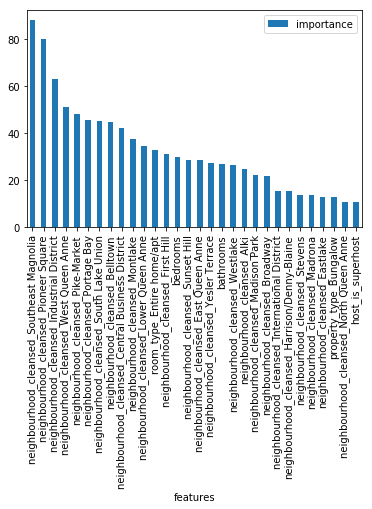

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1000, 500))
coefficients.sort_values('importance',ascending=False)[:30].plot(x='features', y='importance', kind='bar')

In [50]:
#Getting the error on the test dataset to see how linear regression is performing on this dataset
from sklearn import metrics
Y_predict = lm.predict(X_test)
error = np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))
error

62.502561488720204

In [ ]:
#Let us apply Decision Tree
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

#Make the decision tree
decisiontree = tree.DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,)
decisiontree = decisiontree.fit(X_train,Y_train)

#Look at outputs
importances = decisiontree.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

In [ ]:
#Let us test our decision tree regressor to see how it performs on our test dataset
Y_predict = decisiontree.predict(X_test)
error = np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))
error

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=3, random_state=0)
rf.fit(X_train, Y_train)
rf_importances = rf.feature_importances_
rf_result = pd.DataFrame({'feature': feat_names, 'importance': rf_importances})
rf_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

In [ ]:
#Let us test our random forest regressor to see how it performs on our test dataset
Y_predict = rf.predict(X_test)
error = np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))
error